<a href="https://colab.research.google.com/github/SonawaneAjay/data-science-portfolio/blob/master/predicting-diabetes/Predicting_Diabetes_from_Medical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Diabetes from Medical Records**
---


## Content Introduction 

*   Diabetes Mellitus (DM), commonly known as diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time
*   Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body not responding properly to the insulin produced
*   There are three main types of diabetes mellitus:
    1.   Type 1 diabetes results from the pancreas' failure to produce enough insulin due to loss of beta cells. This form was previously referred to as "Insulin-Dependent Diabetes Mellitus" (IDDM) or "juvenile diabetes"
    2.   Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. As the disease progresses, a lack of insulin may also develop. This form was previously referred to as "Non-Insulin-Dependent Diabetes Mellitus" (NIDDM) or "adult-onset diabetes". The most common cause is a combination of excessive body weight and insufficient exercise
    3.   Gestational diabetes is the third main form, and occurs when pregnant women without a previous history of diabetes develop high blood sugar levels

Source: [https://en.wikipedia.org/wiki/Diabetes](https://en.wikipedia.org/wiki/Diabetes)

## Project Introduction
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females with at least 21 years old of Pima Indian heritage. The dataset was procured from the simplilearn (Professional Online Training Institute)

**Business Problem:** To predict whether or not a patient has diabetes, based on certain diagnostic measurements

**Dataset Description:** The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Following is the general description about the data columns in the dataset

  > 
  1.  **Pregnancies** - Number of times pregnant
  2.  **Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  3.  **BloodPressure** - Diastolic blood pressure (mm Hg)
  4.  **SkinThickness** - Triceps skin fold thickness (mm)
  5.  **Insulin** - 2-Hour serum insulin (mu U/ml)
  6.  **BMI** - Body Mass Index (weight in kg/(height in m)^2)
  7.  **DiabetesPedigreeFunction** - Diabetes pedigree function
  8.  **Age** - Age (years)
  9.  **Outcome** - Class variable (0 or 1)

In [1]:
#Importing all basic python packages, other special packages are added with the code

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import read_csv
from sklearn import model_selection
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
medicalReportData = read_csv("/content/NIDDK Dataset.csv")

#Note: For this project I am using the google colab, where the file is uploaded under the content folder

# Basic Data Exploration

In [3]:
medicalReportData.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
medicalReportData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
medicalReportData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Interpretation

**From basic data exploration we found that the range of patient’s age is between 21 to 81. Also, columns like BMI, Insulin, SkinThickness, BloodPressure have minimum values as 0. This shows that there are chances of data leakage.**

#### Data Validation
From the previous step of getting a overview of the dataset, we had found that some columns have 0 and so we will now check the dataset for data leakage by both numeric reading and graphical reading. Note that we are also going to check for null values if any

In [6]:
medicalReportData.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
tempData = medicalReportData.iloc[:, :]
print("Column Name              Number of null values \n")
print((tempData[:] == 0).sum())

Column Name              Number of null values 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
tempData1 = medicalReportData.iloc[:, 1:6]
print("Column Name     Number of null values \n")
print((tempData1[:] == 0).sum())

Column Name     Number of null values 

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


#### Interpretation

1.	Here, we can observe that age and DiabetesPedigreeFunction have no 0’s as data values. Also, the Outcome is also to be ignored as the data for Outcome column is 0 and 1. The number of Pregnancies for patients can also be 0 and so all this columns are not of concern
2.	The columns of concern remains with Glucose, BloodPressure, SkinThickness, Insulin and BMI. Specially SkinThickness and Insulin have major number of 0’s and this can affect any further prediction that we do 
3.	Thus, printing only those columns with concern i.e. which should not have 0 as data values 
4.	**This proves that there is some data leakage**


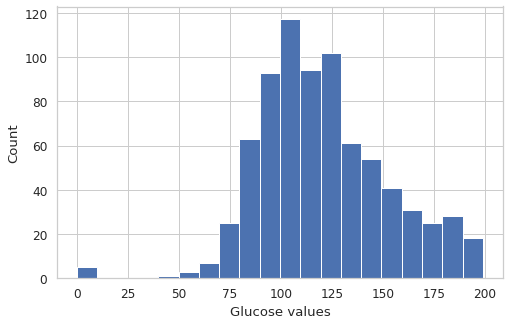

In [9]:
#Bar Graph for data values in Glucose column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    medicalReportData['Glucose'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Glucose values', ylabel='Count');

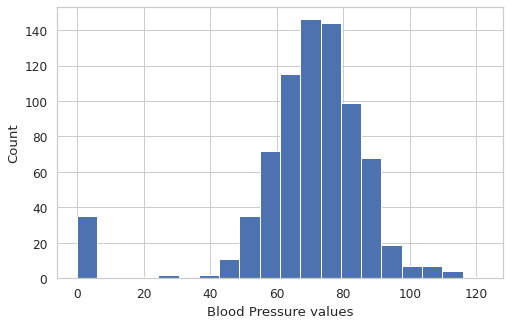

In [10]:
#Bar Graph for data values in Blood Pressure column
sns.distplot(
    medicalReportData['BloodPressure'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Blood Pressure values', ylabel='Count');

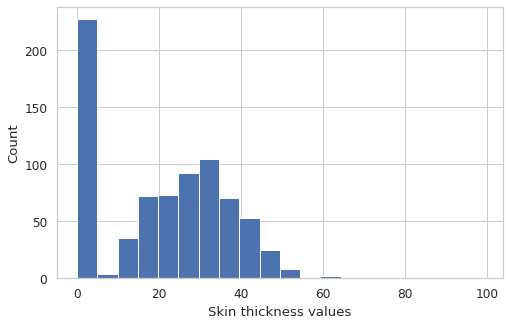

In [11]:
#Bar Graph for data values in Skin Thickness column
sns.distplot(
    medicalReportData['SkinThickness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Skin thickness values', ylabel='Count');

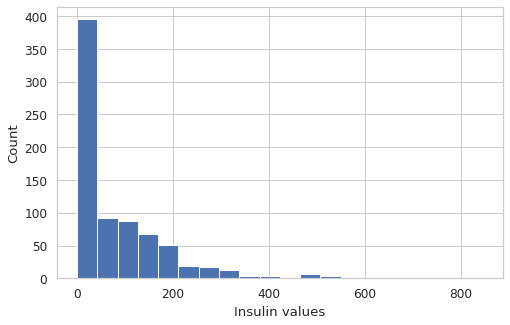

In [12]:
#Bar Graph for data values in Insulin column
sns.distplot(
    medicalReportData['Insulin'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Insulin values', ylabel='Count');

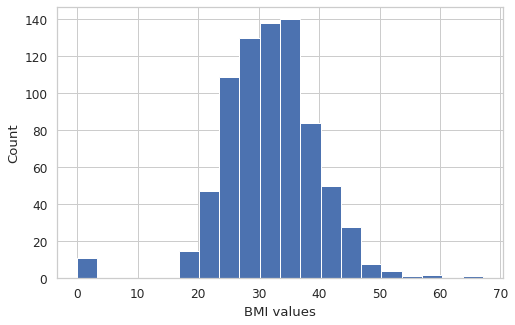

In [13]:
#Bar Graph for data values in BMI column
sns.distplot(
    medicalReportData['BMI'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='BMI values', ylabel='Count');

**This is just a graphical presentation to see the different values and their weightage in each column**
1.	From the **glucose values vs count histrogram graph**, we can see that majority of values in the glucose column is between 80 to 130. 
2.	From the **blood pressure values vs count histrogram graph**, we can see that there are many records with 0 which totally looks like a outlier. The majority of blood pressure values is between 50 to 90
3.	From the **skin thickness values vs count histrogram graph**, we can easily see that the count of 0’s is more than any other values count
4.	From the **insulin values vs count histrogram graph**, we can see that, insulin values majorly under 300, but the count of 0 data values is highest and not ignorable at all
5.	From the **BMI values vs count histrogram graph**, we can see that, the majority of BMI values are between 20 to 50. And also, there are quite notable amount of 0 data values as well.


# Data Cleaning and Data Transformation
Performing imputer operation, using which we will be replacing the 0 values with the column’s median value

**Note**: For data cleaning and transformation, a temporary dataset is created so that no data is lost during any operations

In [14]:
tempData = medicalReportData.iloc[:, :-1]
imputer = SimpleImputer(missing_values=0, strategy='median')
tempData2 = imputer.fit_transform(tempData)
processed_data = pd.DataFrame(tempData2)

In [15]:
processed_data.rename(columns={processed_data.columns[0]: "Pregnancies"}, inplace=True)
processed_data.rename(columns={processed_data.columns[1]: "Glucose"}, inplace=True)
processed_data.rename(columns={processed_data.columns[2]: "BloodPressure"}, inplace=True)
processed_data.rename(columns={processed_data.columns[3]: "SkinThickness"}, inplace=True)
processed_data.rename(columns={processed_data.columns[4]: "Insulin"}, inplace=True)
processed_data.rename(columns={processed_data.columns[5]: "BMI"}, inplace=True)
processed_data.rename(columns={processed_data.columns[6]: "DiabetesPedigreeFunction"}, inplace=True)
processed_data.rename(columns={processed_data.columns[7]: "Age"}, inplace=True)

processed_data['Outcome'] = medicalReportData['Outcome']

In [16]:
print("Column Name     Number of null values \n")
print((processed_data[:] == 0).sum())

Column Name     Number of null values 

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


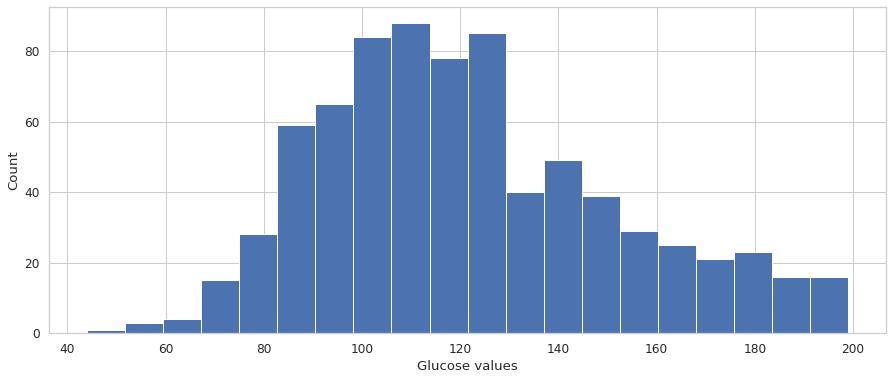

In [17]:
#Bar Graph for data values in Glucose column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 6]})
sns.distplot( 
    processed_data['Glucose'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Glucose values', ylabel='Count');

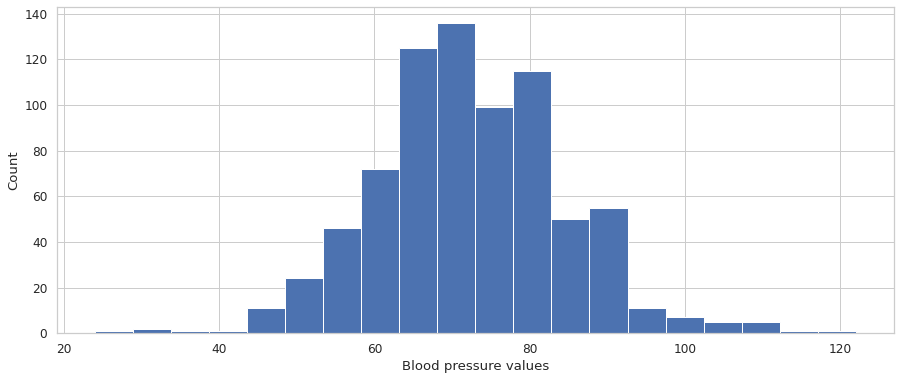

In [18]:
#Bar Graph for data values in Blood pressure column
sns.distplot(
    processed_data['BloodPressure'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Blood pressure values', ylabel='Count');

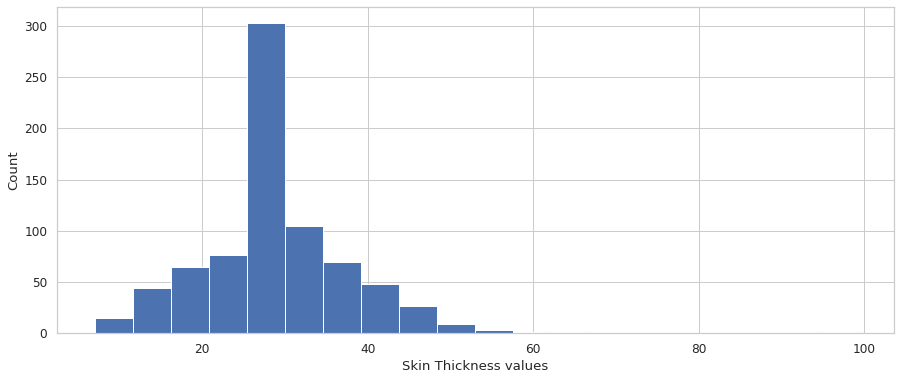

In [19]:
#Bar Graph for data values in Skin Thickness column
sns.distplot(
    processed_data['SkinThickness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Skin Thickness values', ylabel='Count');

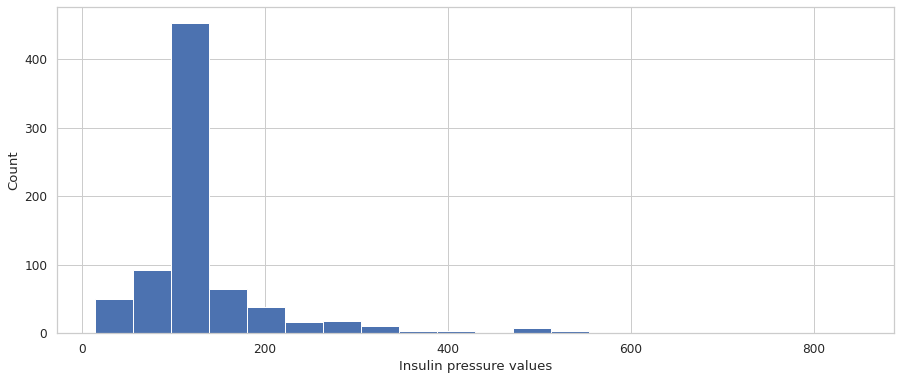

In [20]:
#Bar Graph for data values in Insulin pressure column
sns.distplot(
    processed_data['Insulin'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Insulin pressure values', ylabel='Count');

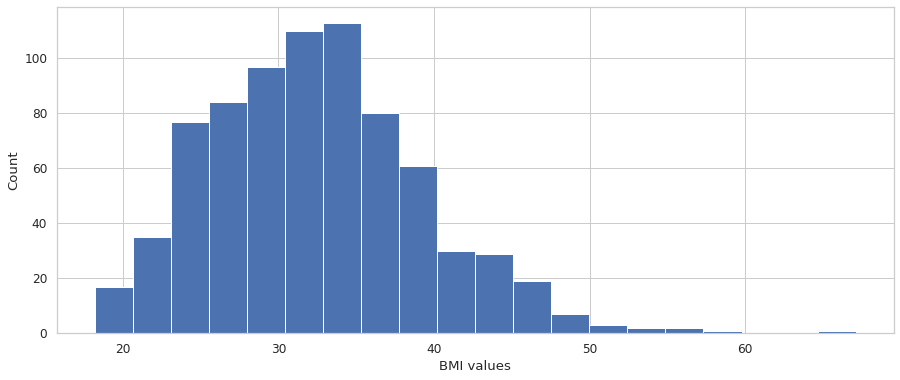

In [21]:
#Bar Graph for data values in BMI column
sns.distplot(
    processed_data['BMI'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='BMI values', ylabel='Count');

In [22]:
processed_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Interpretation
1.	Here, we created a temporary dataset to perform imputer operation, using which we replaced the 0 data values with the column’s median value. Also, while creating the temporary dataset, we ignored the Outcome column.
2.	Checking the count of 0 values, if there are any uisng both the numeric reading method and the graphical representation of the data values of each column
3. Here from the processed columns we are only going to take the concerned columns, which were actually required to have no 0’s as data values. Than we replaced the processed data into our original dataset
2.	Finally, printing the data statistics of min, median, max, standard deviation, etc. of our transformed and final data 
  


# Basic Statistics and co-relation
We will study the transformed data and will understand the co-relation between columns 


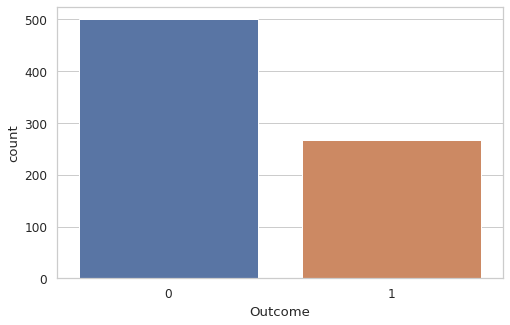

In [23]:
#Bar Graph for Outcome column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(processed_data['Outcome']);

In [24]:
print("Total number of patients:                ", (processed_data['Outcome']).count() ) 
print("Total number of diabetic patients:       ", (processed_data['Outcome'] == 1).sum() ) 
print("Total number of non diabetic patients:   ", (processed_data['Outcome'] == 0).sum() ) 
print("Diabetic patients %:                     ", round((processed_data['Outcome'] == 1).sum()/768*100, 3), " %" ) 
print("Non diabetic patients %:                 ", round((processed_data['Outcome'] == 0).sum()/768*100, 3), " %" )

Total number of patients:                 768
Total number of diabetic patients:        268
Total number of non diabetic patients:    500
Diabetic patients %:                      34.896  %
Non diabetic patients %:                  65.104  %


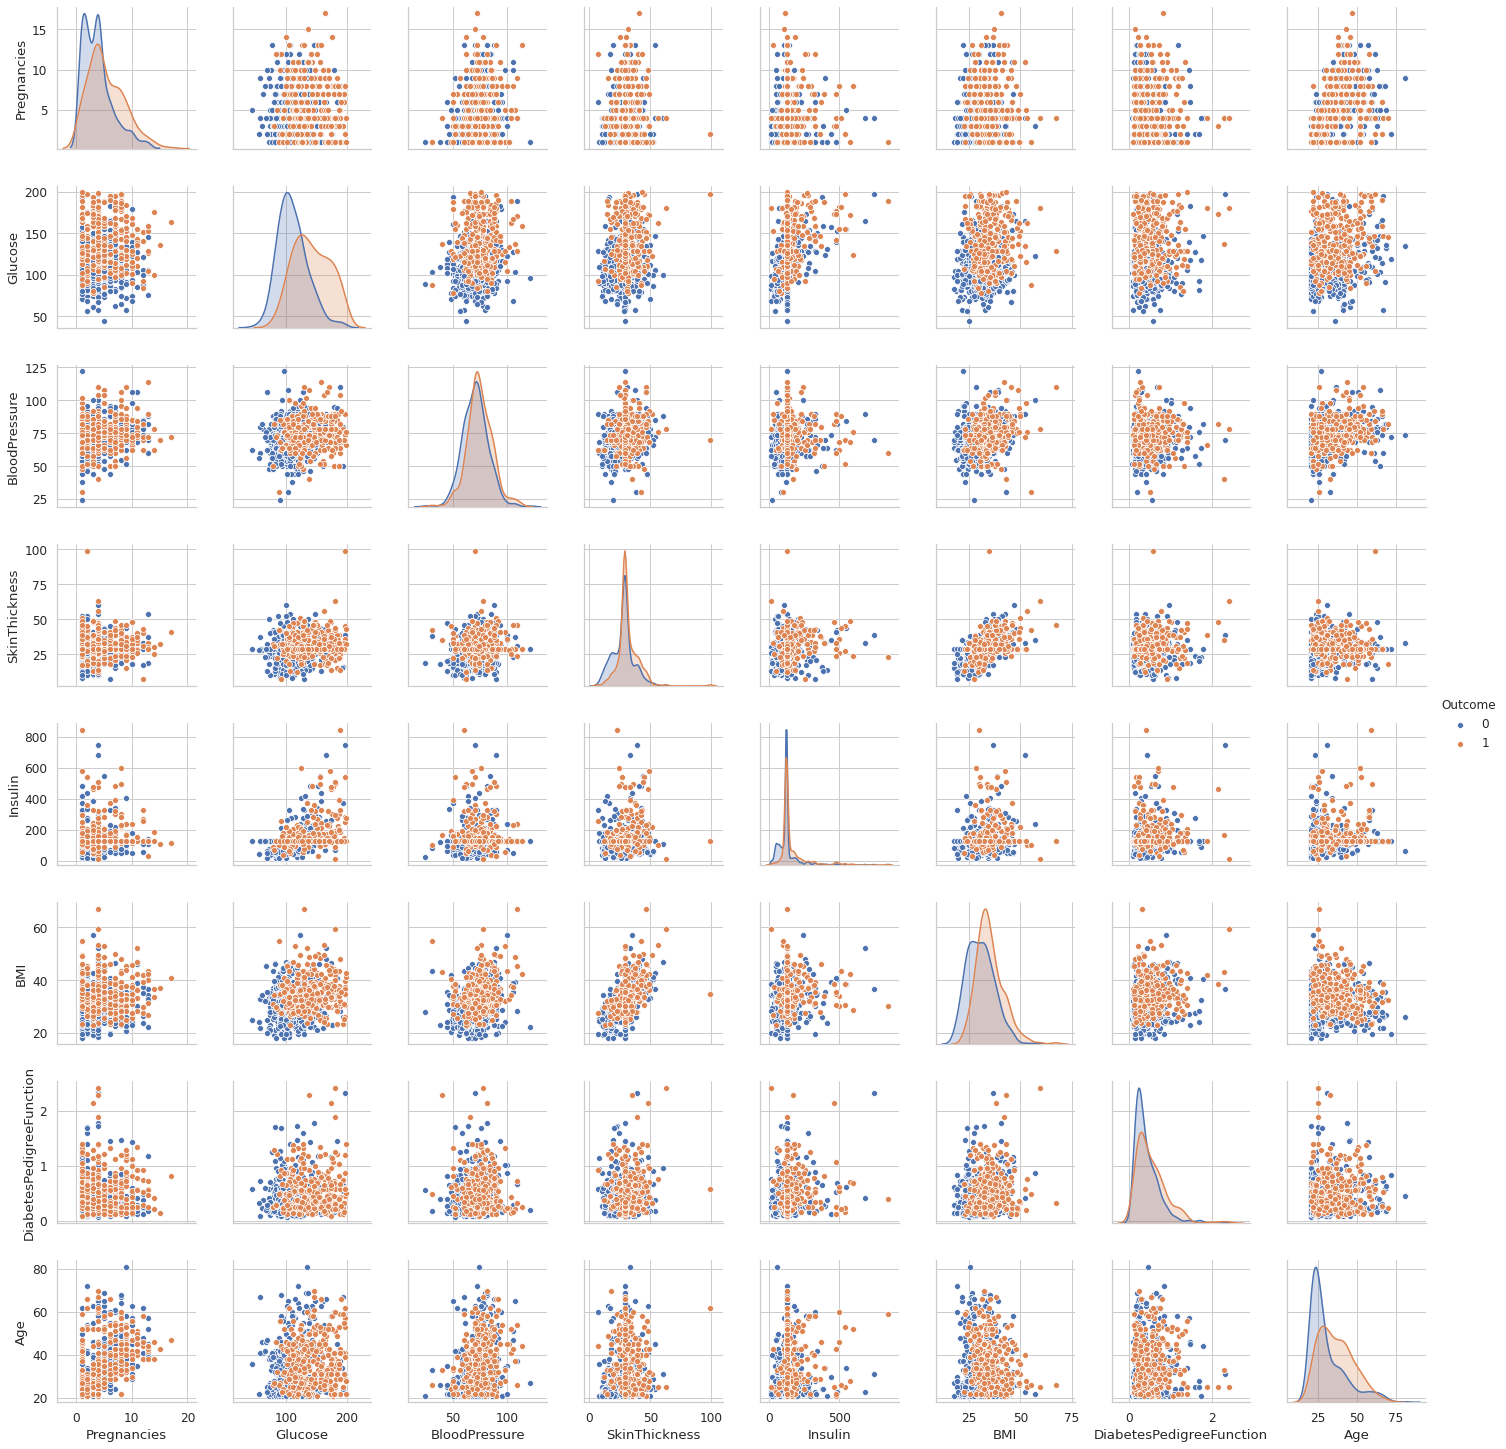

In [25]:
sns.pairplot(processed_data, hue='Outcome')

In [26]:
processed_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


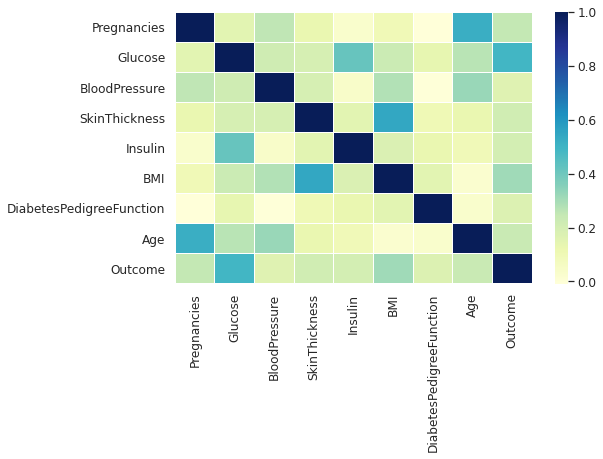

In [27]:
sns.heatmap(processed_data.corr(), annot=False, linewidths=.10, cmap="YlGnBu")

##Interpretation
1.	From the histogram created using the countplot() function, we can see that out of total 768 records, **268 are diabetic patients** and **500 are non diabetic patients**
2.	So we state that out of the total population, **34.89% are diabetic** patients and the remaining **65.10% are non-diabetic** patients
3.	Using the pairplot, we are able to generate scatter plots for all columns against each other. Also we are using Outcome column for the hue property, which is why the **orange color in the graphs denote 1(diabetic)** and **blue color denotes 0(non-diabetic)** patients
4.	The correlation values between variables are generated using the corr() function. Also, a heat map displaying the relation between columns is generated using the heatmap() function
5.	With all the scatter plots, only the **measure correlations that are notable** are:
 * BMI and SkinThickness are positively corelated the most then all others 
 * Glucose has the strongest relation with the Outcome(predictor variable) column
 * Also, BMI has strong relation with the Outcome(predictor variable) column
 * The Insulin and SkinThickness measurements are not highly correlated with Outcome, and so we can rule out concern of the data leakage

6.	**Finally, from all the generated output, we can see that Glucose and BMI are the variables that are strongly co-related to the Outcome variable**



# Model Building
Using sklearn, we are splitting the population data into 20% for testing and 80% for training. Also, we will use the median values instead of 0, for only training dataset.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def build_model(model, x_test, y_test):

    #Predicting values for the test dataset
    predicted_values = model.predict(x_test)
    print("Predicted values : \n", predicted_values)
    print("----------------------------------------------------------------------------------")
    
    #Predicting probability values i.e. probabilities of a datapoint following in class
    predicted_probability = model.predict_proba(x_test)
    print("Top 10 Predicted Probability : \n", predicted_probability[0:10])
    print("----------------------------------------------------------------------------------")     
    
    #Creating confusion matric 
    con_matrix = confusion_matrix(predicted_values, y_test)
    print("Confusion matrix : \n", con_matrix)
    print("----------------------------------------------------------------------------------")
    
    #calculating Accuracy Percentage
    Accuracy = con_matrix.diagonal().sum() / con_matrix.sum() * 100
    print("\nAccuracy percentage : ", round(Accuracy, 2), " %")
    
    #calculating F1 Score
    f1 = f1_score(y_test, predicted_values)
    print("\nF1 Score : ", round(f1, 4))
    
    #calculating AUROC score Percentage
    auroc_score = roc_auc_score(y_test, predicted_values)
    print("\nAUROC Score : ", round(auroc_score, 4))
    print("----------------------------------------------------------------------------------")
    
    #Here we are consedering 0th column i.e. 'No' as Attrition value
    pred_prob = pd.DataFrame(predicted_probability)
    fpr, tpr, threshold = roc_curve(y_test, pred_prob.iloc[ : , 0])
    
    plt.figure(figsize = (8,8))
    plt.plot(fpr, tpr, color = "red")
    plt.xlabel("Fpr Values")
    plt.ylabel("Tpr Values")
    plt.title("AUROC CURVE for attrition")
    plt.grid()

----------------------------------------------------------------------------------
First Iteration : 
Number of rows and columns used for prediction  :  (768, 8)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (614, 8)
Number of rows and columns in test dataset    :  (154, 8)
----------------------------------------------------------------------------------
Predicted values : 
 [0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 1]
----------------------------------------------------------------------------------
Top 10 Predicted Probability : 
 [[0.73014406 0.26985594]
 [0.18524512 0.81475488]
 [0.87091177 0.12908823]
 [0.59154679 0.40845321]
 [0.8

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


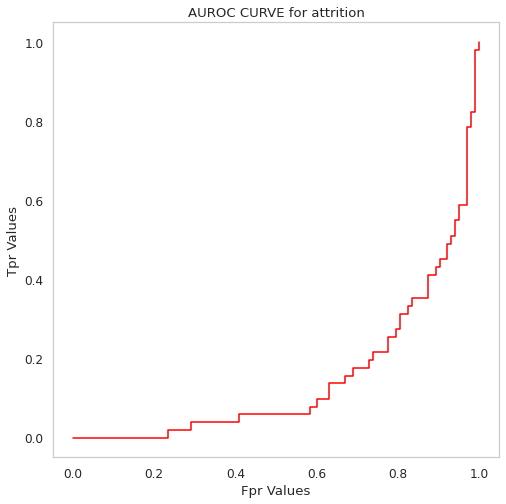

In [86]:
#First Iteration of model building
print("----------------------------------------------------------------------------------")
print("First Iteration : ")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = medicalReportData.drop('Outcome', axis=1)
y_data = medicalReportData.Outcome
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#Spliting the dataset into train and test usign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

#printing dimentions of splitted dataset
print("Number of rows and columns in train dataset   : ", x_train.shape)
print("Number of rows and columns in test dataset    : ", x_test.shape)
print("----------------------------------------------------------------------------------")

#creating object for model building
model = LogisticRegression()
model.fit(x_train, y_train)

#calling user defined function 
build_model(model, x_test, y_test)

----------------------------------------------------------------------------------
Second Iteration : 
Number of rows and columns used for prediction  :  (768, 8)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (614, 8)
Number of rows and columns in test dataset    :  (154, 8)
----------------------------------------------------------------------------------
Predicted values : 
 [1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 1 1 0 1 0 0]
----------------------------------------------------------------------------------
Top 10 Predicted Probability : 
 [[0.45669291 0.54330709]
 [0.07272727 0.92727273]
 [1.         0.        ]
 [0.75728155 0.24271845]
 [0.

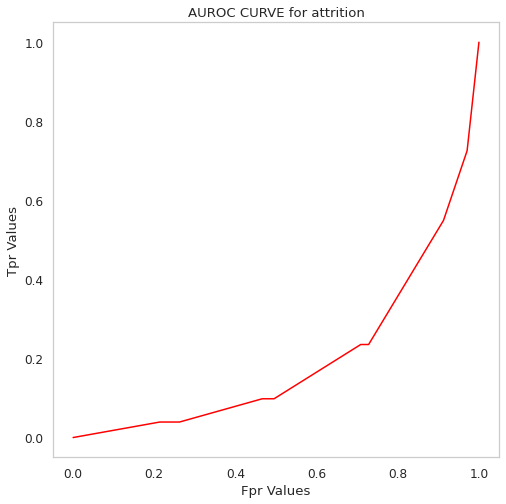

In [91]:
#Second Iteration of model building
print("----------------------------------------------------------------------------------")
print("Second Iteration : ")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = medicalReportData.drop('Outcome', axis=1)
y_data = medicalReportData.Outcome
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#Spliting the dataset into train and test usign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

#printing dimentions of splitted dataset
print("Number of rows and columns in train dataset   : ", x_train.shape)
print("Number of rows and columns in test dataset    : ", x_test.shape)
print("----------------------------------------------------------------------------------")

#creating object for model building
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 4)
model.fit(x_train, y_train)

#calling user defined function 
build_model(model, x_test, y_test)

In [92]:
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [93]:
dot_data = StringIO()
x_train_names  = x_train.columns

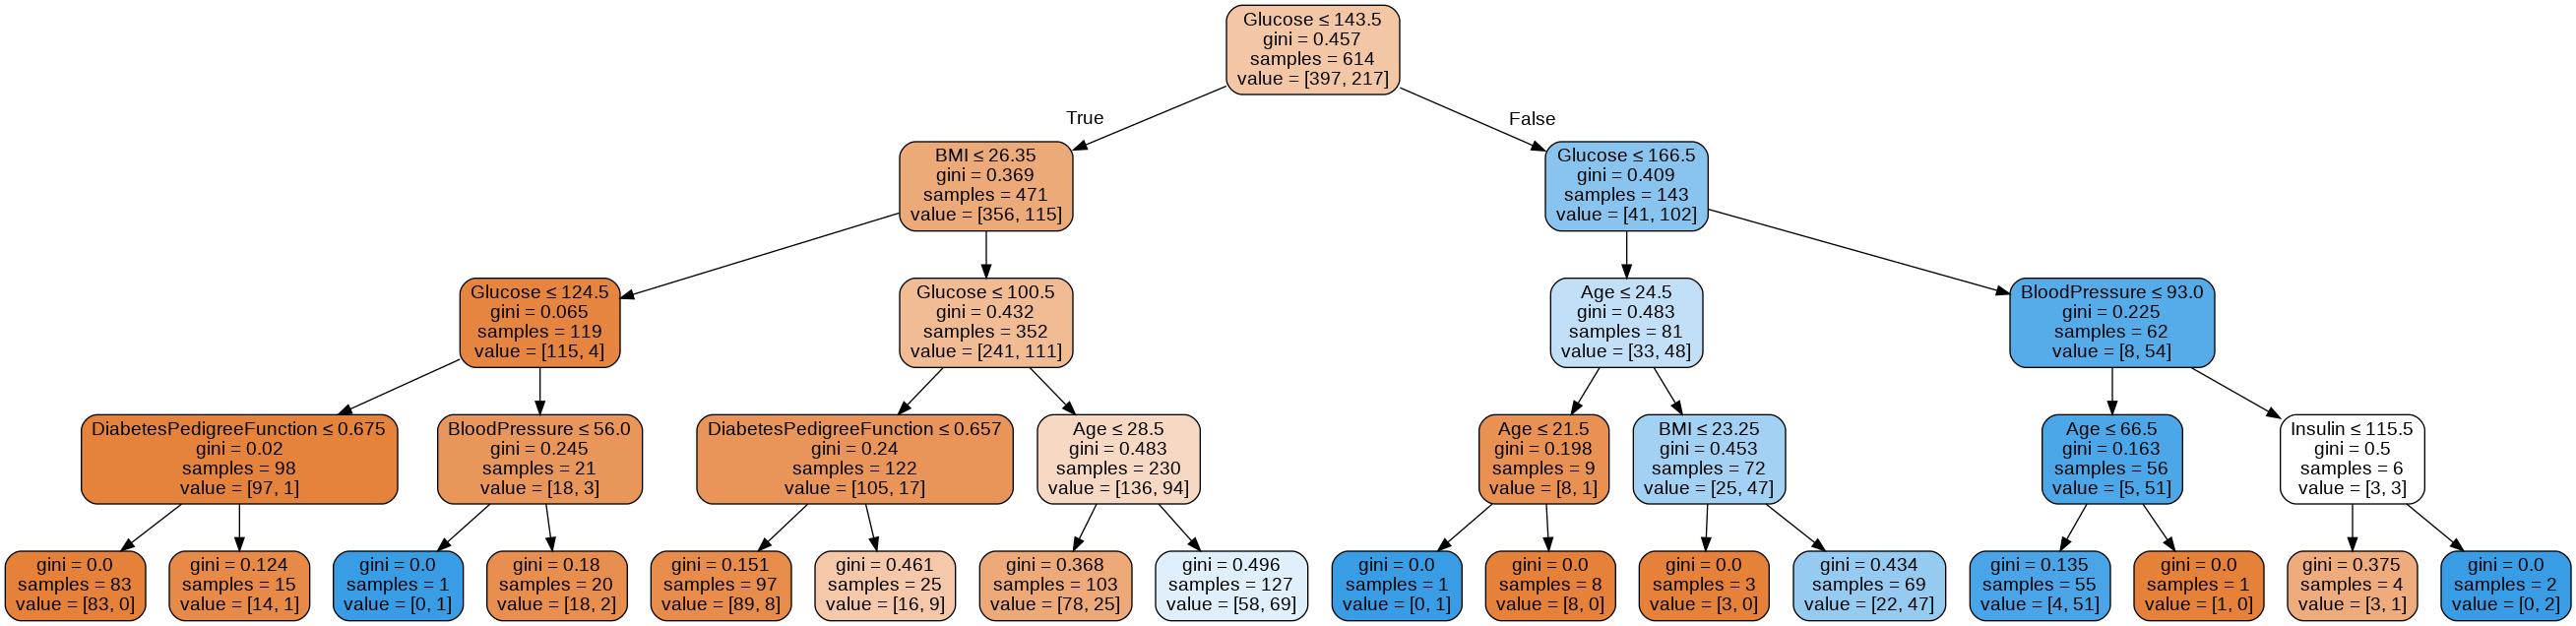

<Figure size 864x1440 with 0 Axes>

In [94]:
fig = plt.figure(figsize=(12,20))

export_graphviz(model, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = x_train_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

----------------------------------------------------------------------------------
Third Iteration : 
Number of rows and columns used for prediction  :  (768, 8)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (614, 8)
Number of rows and columns in test dataset    :  (154, 8)
----------------------------------------------------------------------------------
Predicted values : 
 [0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 0]
----------------------------------------------------------------------------------
Top 10 Predicted Probability : 
 [[0.70627786 0.29372214]
 [0.17877179 0.82122821]
 [0.87034291 0.12965709]
 [0.58880021 0.41119979]
 [0.8

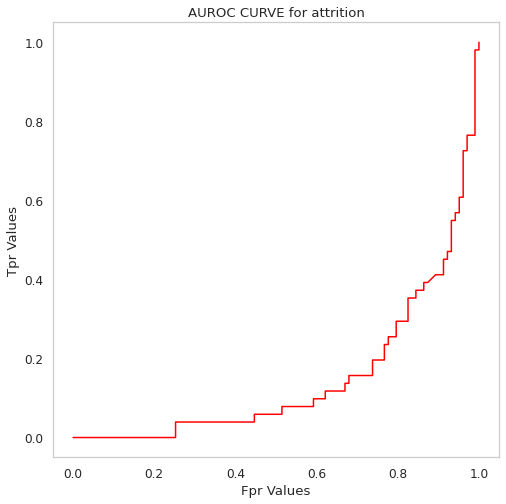

In [97]:
#Third Iteration of model building
print("----------------------------------------------------------------------------------")
print("Third Iteration : ")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = medicalReportData.drop('Outcome', axis=1)
y_data = medicalReportData.Outcome
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#Spliting the dataset into train and test usign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

#printing dimentions of splitted dataset
print("Number of rows and columns in train dataset   : ", x_train.shape)
print("Number of rows and columns in test dataset    : ", x_test.shape)
print("----------------------------------------------------------------------------------")

#creating reg object for model building
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

#calling user defined function 
build_model(model, x_test, y_test)

----------------------------------------------------------------------------------
Forth Iteration : 
Number of rows and columns used for prediction  :  (768, 8)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (614, 8)
Number of rows and columns in test dataset    :  (154, 8)
----------------------------------------------------------------------------------
Predicted values : 
 [1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0]
----------------------------------------------------------------------------------
Top 10 Predicted Probability : 
 [[0.25 0.75]
 [0.   1.  ]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [1.   0.  ]
 

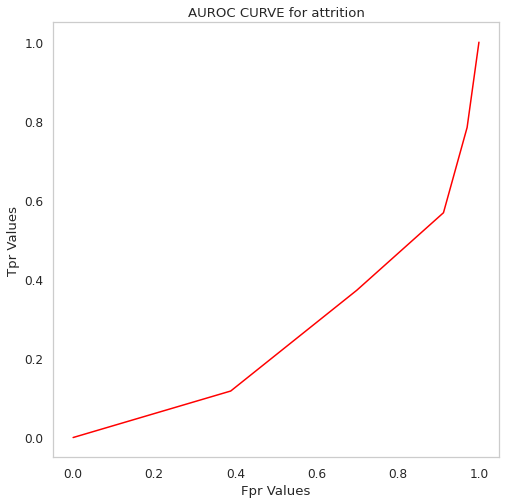

In [112]:
#Forth Iteration of model building
print("----------------------------------------------------------------------------------")
print("Forth Iteration : ")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = medicalReportData.drop('Outcome', axis=1)
y_data = medicalReportData.Outcome
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#Spliting the dataset into train and test usign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

#printing dimentions of splitted dataset
print("Number of rows and columns in train dataset   : ", x_train.shape)
print("Number of rows and columns in test dataset    : ", x_test.shape)
print("----------------------------------------------------------------------------------")

#creating reg object for model building
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)

#calling user defined function 
build_model(model, x_test, y_test)

In [113]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dtc  = DecisionTreeClassifier()

In [114]:
RFE_dtc = RFE(dtc, 5)
RFE_dtc.fit(x_data , y_data)

RFE_dtc.support_

array([False,  True,  True, False, False,  True,  True,  True])

In [115]:
df_feature  = pd.DataFrame({"Feature" : x_data.columns , "Significant Status": list(RFE_dtc.support_) } )
print(df_feature)

                    Feature  Significant Status
0               Pregnancies               False
1                   Glucose                True
2             BloodPressure                True
3             SkinThickness               False
4                   Insulin               False
5                       BMI                True
6  DiabetesPedigreeFunction                True
7                       Age                True


In [116]:
print(df_feature[df_feature['Significant Status'] == True])

                    Feature  Significant Status
1                   Glucose                True
2             BloodPressure                True
5                       BMI                True
6  DiabetesPedigreeFunction                True
7                       Age                True


In [117]:
df_feature[df_feature['Significant Status'] == True].index

Int64Index([1, 2, 5, 6, 7], dtype='int64')

----------------------------------------------------------------------------------
Iteration after RFE: 
Number of rows and columns used for prediction  :  (768, 5)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (614, 5)
Number of rows and columns in test dataset    :  (154, 5)
----------------------------------------------------------------------------------
Predicted values : 
 [0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 0]
----------------------------------------------------------------------------------
Top 10 Predicted Probability : 
 [[0.59833908 0.40166092]
 [0.16940567 0.83059433]
 [0.88181096 0.11818904]
 [0.48449586 0.51550414]
 [

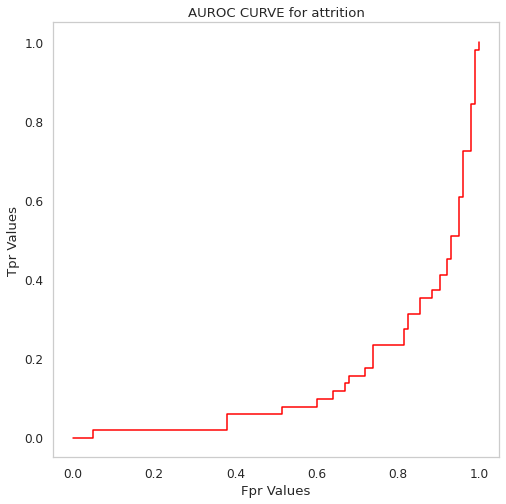

In [119]:
#Iteration after RFE of model building
print("----------------------------------------------------------------------------------")
print("Iteration after RFE: ")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = medicalReportData.iloc[:, [1, 2, 5, 6, 7]]
y_data = medicalReportData.Outcome
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#Spliting the dataset into train and test usign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

#printing dimentions of splitted dataset
print("Number of rows and columns in train dataset   : ", x_train.shape)
print("Number of rows and columns in test dataset    : ", x_test.shape)
print("----------------------------------------------------------------------------------")

#creating object for model building
model = LogisticRegression()
model.fit(x_train, y_train)

#calling user defined function 
build_model(model, x_test, y_test)

# Conclusion
1. Created a model, to predict the diabetes status using all the independent columns. Here we used **Logistic Regression** for creating the model. The model predictions were fair and the metrics we got from the first iteration are: 
    * Accuracy Percentage  :  79.87  %
    * F1 Score             :  0.6804
    * AUROC Score          :  0.7604 
2. Then we created the model using **Decision Tree Classifier**. The model predictions accuracy and F1 score did not improved. The metrics we got from the second iteration are: 
    * Accuracy Percentage  :  74.03  %
    * F1 Score             :  0.661
    * AUROC Score          :  0.7464
3. Later we created a Tree Graph to visualize the model working
4. We created the model again with **Support Vector Machine**. The model predictions accuracy and F1 score slightly improved. The metrics we got from the third iteration are:
    * Accuracy Percentage  :  98.57  %
    * F1 Score             :  0.6526
    * AUROC Score          :  0.7408
5. Later we build the model using with **KNN**. The model predictions accuracy and F1 score had decreased. The metrics we got from the forth iteration are:
    * Accuracy Percentage  :  75.32  %
    * F1 Score             :  0.5366
    * AUROC Score          :  0.672
6. Finally, we did feature selection and recreated the model again with **Logistic Regression**. The model predictions accuracy and F1 score slightly improved. The metrics we got from the fifth iteration are:
    * Accuracy Percentage  :  80.52 %
    * F1 Score             :  0.6809
    * AUROC Score          :  0.7603 

**Thus, we found that parameters such as Glucose, BloodPressure, BMI, DiabetesPedigreeFunction and, Age are some of the parameters, which show strong association with diabetes Outcome.**